# Credit_Card Fraud detection

### Introduction:

Credit card fraud detection is a critical issue that banks and financial institutions face. This project aims to create a model to identify fraudulent transactions accurately using the dataset available. Here, we’ll explore, preprocess, and model the data using a Logistic Regression model.

### Dataset Overview

The dataset contains transactions made by credit card in September 2013. It includes a Class column, where 1 represents fraud and 0 represents non-fraud. Our goal is to classify these transactions as fraud or non-fraud

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

###  Loading and Reviewing the Dataset

In [92]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=284807, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [93]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Exploratory Data Analysis

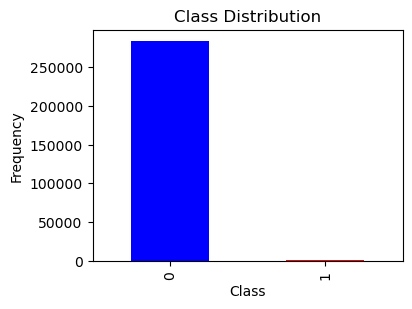

In [94]:
plt.figure(figsize = (4,3))
df['Class'].value_counts().plot(kind = 'bar', color=['blue','red'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

### Observation

The dataset is imbalanced, with a significantly higher number of legitimate transactions than fraudulent ones.

Class 0 = 284315

Class 1 = 492

### Feature Correlations

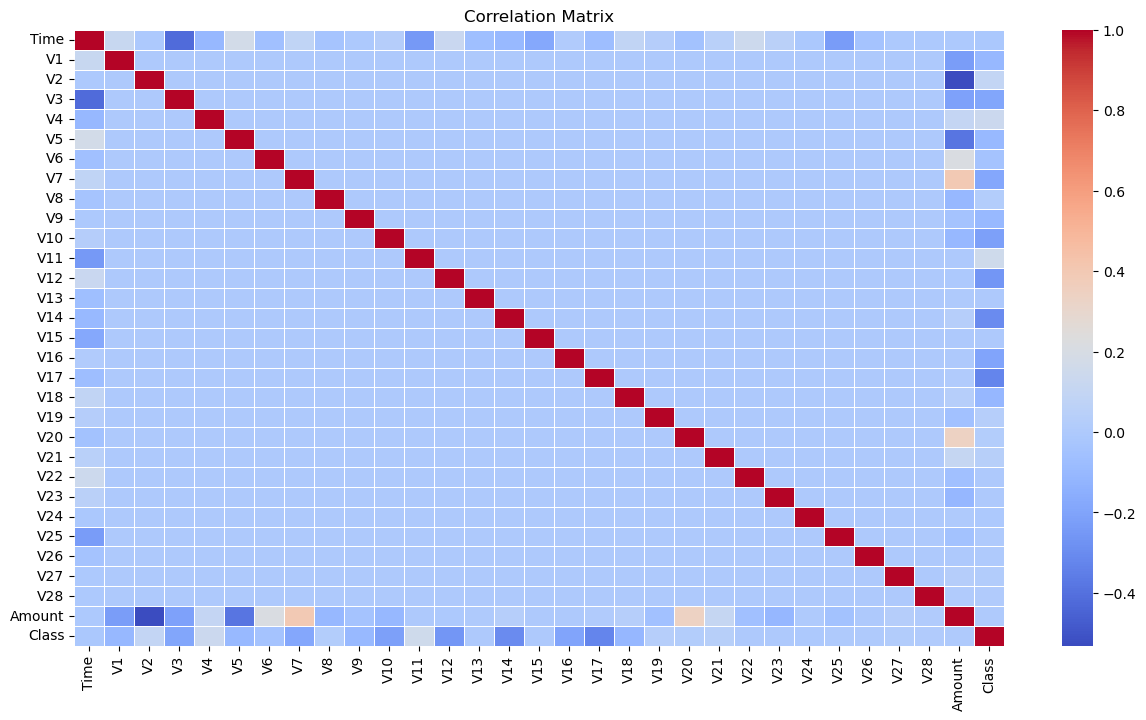

In [97]:
plt.figure(figsize = (15,8))
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = False, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [14]:
x_train.shape

(199364, 30)

In [15]:
y_train.shape

(199364,)

In [16]:
x_test.shape

(85443, 30)

### Modeling and Evaluation

Logistic Regression Model:

Using Logistic Regression due to its simplicity and interpretability in this binary classification task.

In [99]:
model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.9988881476539916


#### Sampling Techniques to Balanced The data

#### Under Sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
rus = RandomUnderSampler(random_state = 42)

In [19]:
res_x,res_y = rus.fit_resample(x_train,y_train)

In [20]:
res_x.shape

(694, 30)

In [21]:
y_train.value_counts()

Class
0    199017
1       347
Name: count, dtype: int64

In [29]:
model = LogisticRegression()
model.fit(res_x,res_y)
model.score(x_test,y_test)

0.9562632398206992

In [30]:
ypred = model.predict(x_test)

In [32]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

154980    0
27066     0
78320     0
186096    0
247941    0
         ..
159069    0
91390     0
92435     0
85567     0
146056    0
Name: Class, Length: 85443, dtype: int64

In [37]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85298
           1       0.03      0.90      0.07       145

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [41]:
cm = confusion_matrix(y_test,ypred)

In [42]:
cm

array([[81576,  3722],
       [   15,   130]], dtype=int64)

In [44]:
print(accuracy_score(y_test,ypred))

0.9562632398206992


#### OverSampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state = 42)

In [47]:
x_ros,y_ros = ros.fit_resample(x_train,y_train)

In [48]:
x_ros.shape

(398034, 30)

In [52]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9988881476539916

In [53]:
ypred = model2.predict(x_test)

In [54]:
print(accuracy_score(y_test, ypred))

0.9988881476539916


In [55]:
cm = confusion_matrix(y_test,ypred)

In [56]:
cm

array([[85239,    59],
       [   36,   109]], dtype=int64)

In [57]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.65      0.75      0.70       145

    accuracy                           1.00     85443
   macro avg       0.82      0.88      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### SMOTE

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=42)

In [61]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [62]:
x_smote.shape

(398034, 30)

In [63]:
model3 = LogisticRegression()
model3.fit(x_smote,y_smote)
model3.score(x_test,y_test)

0.9794716945800124

In [64]:
ypred = model3.predict(x_test)

In [65]:
accuracy_score(y_test,ypred)

0.9794716945800124

In [67]:
cm = confusion_matrix(y_test,ypred)

In [68]:
cm

array([[83560,  1738],
       [   16,   129]], dtype=int64)

In [70]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85298
           1       0.07      0.89      0.13       145

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



#### Basic Random Forest Classifier

In [72]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [74]:
model4 = BalancedRandomForestClassifier()
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9747902110178716

In [75]:
ypred = model4.predict(x_test)

In [77]:
accuracy_score(y_test,ypred)

0.9747902110178716

In [78]:
cm = confusion_matrix(y_test,ypred)

In [79]:
cm

array([[83160,  2138],
       [   16,   129]], dtype=int64)

In [81]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85298
           1       0.06      0.89      0.11       145

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



#### Class_Weight Method

In [84]:
model5 = LogisticRegression(class_weight= {0:1,1:3})
model5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.9984317030066828

In [85]:
ypred = model5.predict(x_test)

In [86]:
accuracy_score(y_test,ypred)

0.9984317030066828

In [87]:
cm = confusion_matrix(y_test,ypred)

In [88]:
cm

array([[85191,   107],
       [   27,   118]], dtype=int64)

In [89]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.52      0.81      0.64       145

    accuracy                           1.00     85443
   macro avg       0.76      0.91      0.82     85443
weighted avg       1.00      1.00      1.00     85443

